In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import HoltWinter's Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

C:\Users\user\AppData\Local\Temp\ipykernel_2040\1996268239.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Retail_sales_of_electricity_monthly.csv', index_col='Month', parse_dates=True)
# rename Month column to Date
df.index.names = ['Date']
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2040\1673049970.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Retail_sales_of_electricity_monthly.csv', index_col='Month', parse_dates=True)


,Sales
Date,
2023-12-01,NaN
2023-11-01,310959.15193
2023-10-01,293487.06424
2023-10-01,NaN
2023-10-01,NaN


In [3]:
# count nnas
df.isna().sum()

Sales    229
dtype: int64

<Axes: xlabel='Date'>

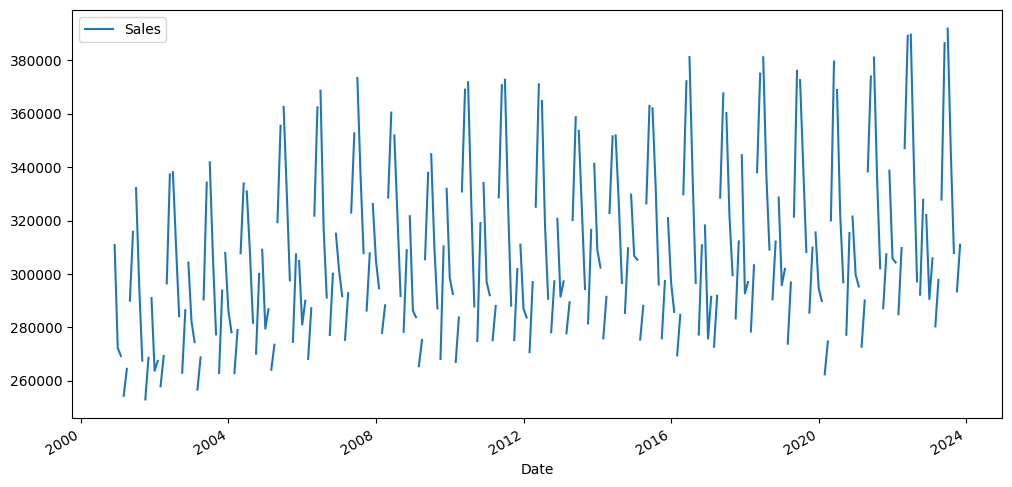

In [4]:
df.plot(figsize=(12, 6))

In [5]:
df.dropna(inplace=True)

In [6]:
#df.interpolate(inplace=True)
#df.plot(figsize=(12, 6))

do sliding folding for example 3 years as train data and then do prediction for 3 month and then slide this and for each position of th train set we weill get error. Then after finishing this process we get list of errors. Then find which model(best hiperparameters) 

Preparing folding

In [7]:
# months in dataset
print(f'Number of months: {len(df)}')
print(f'Number of years: {len(df)//12}')

Number of months: 276
Number of years: 23


TEST: 42 TRAIN: 6


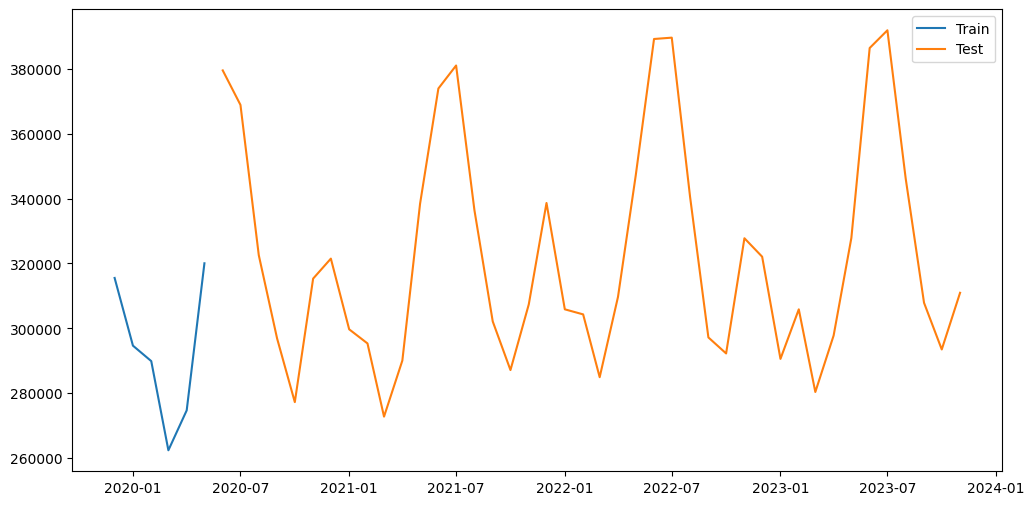

TEST: 48 TRAIN: 6


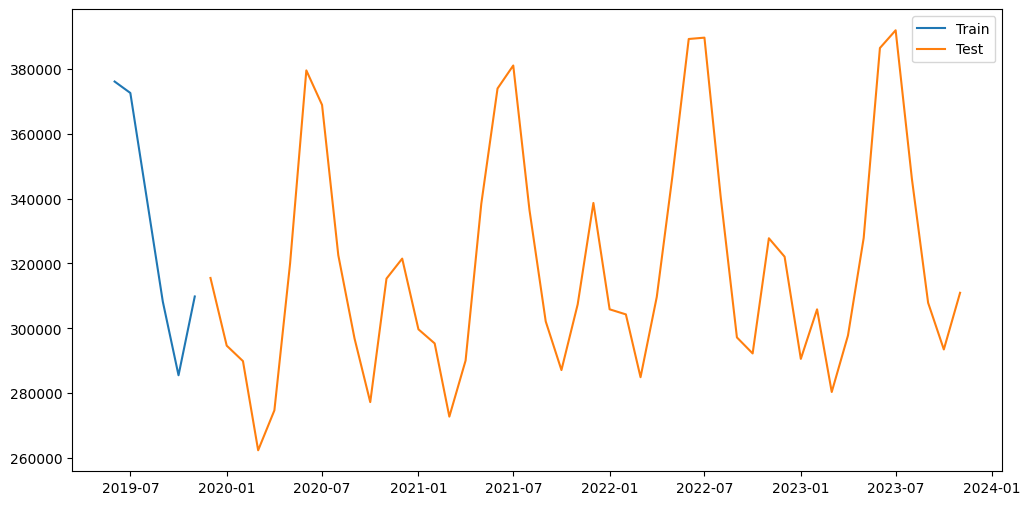

TEST: 54 TRAIN: 6


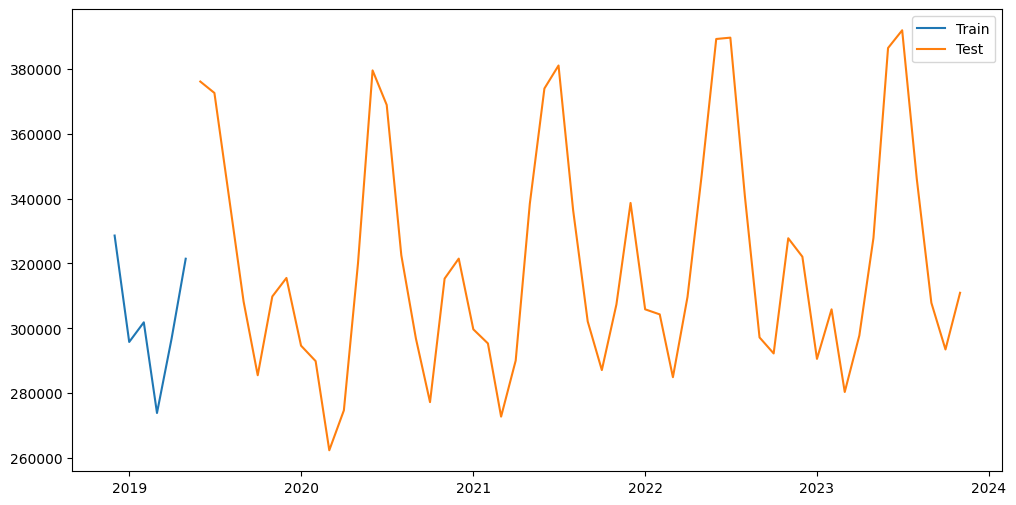

TEST: 60 TRAIN: 6


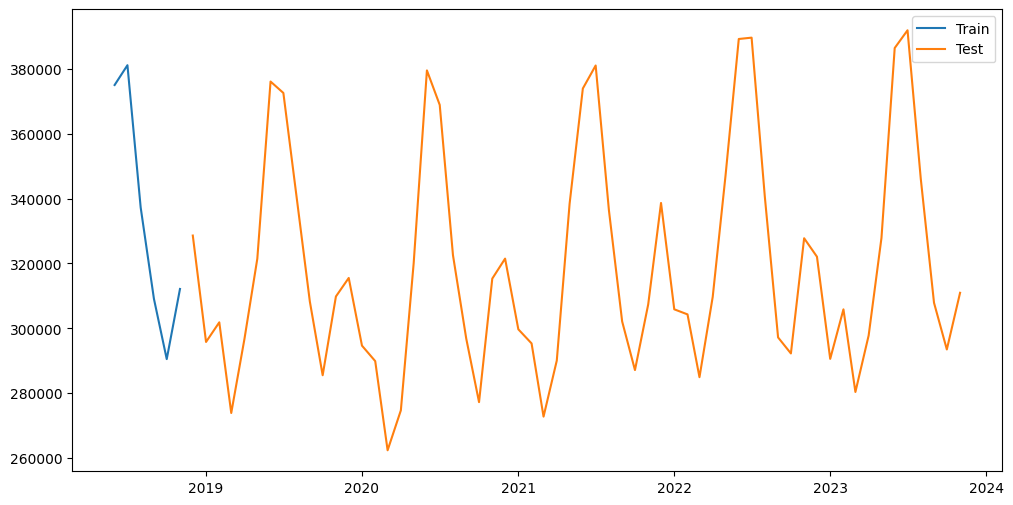

TEST: 66 TRAIN: 6


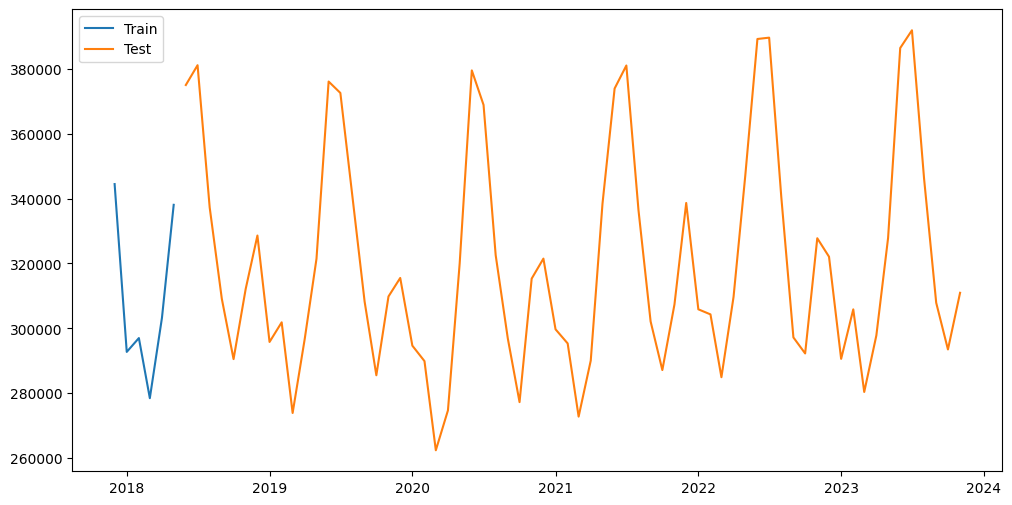

TEST: 72 TRAIN: 6


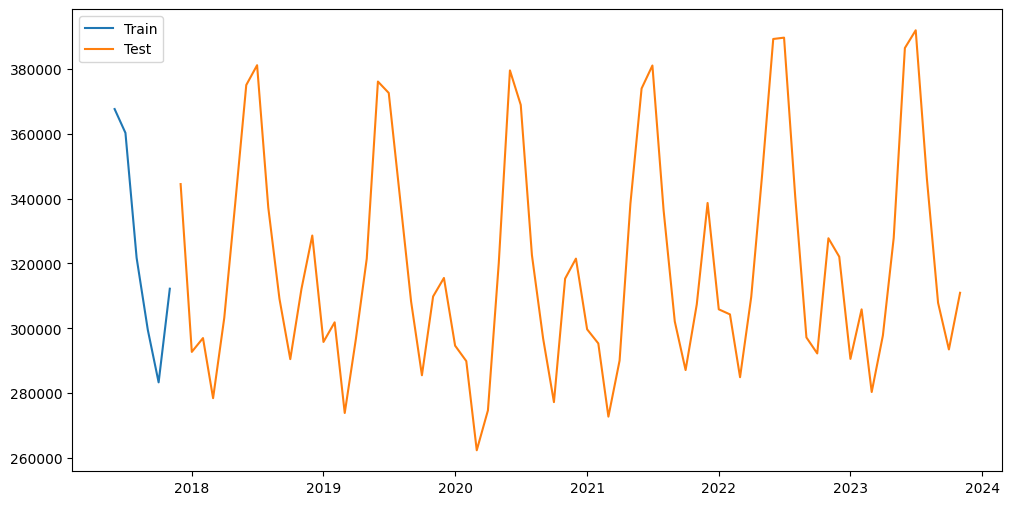

TEST: 78 TRAIN: 6


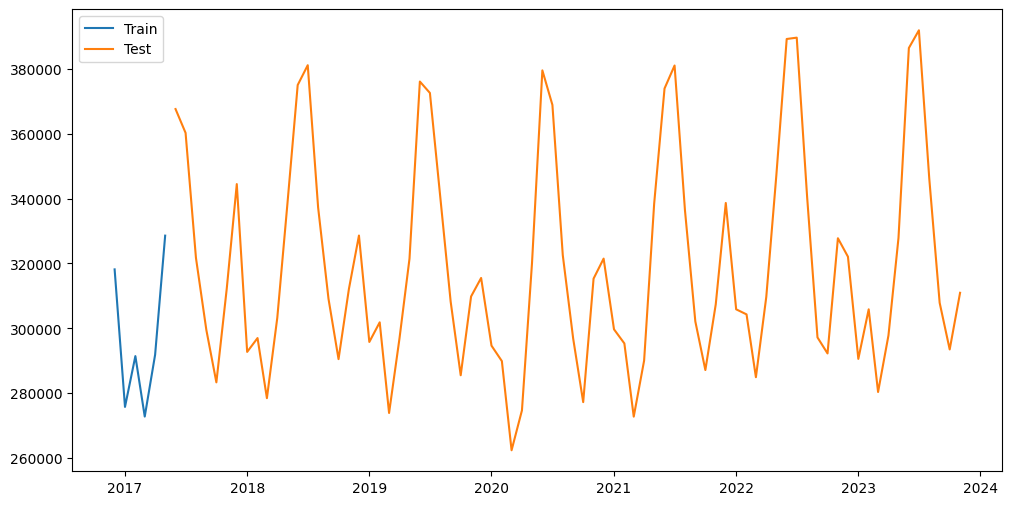

TEST: 84 TRAIN: 6


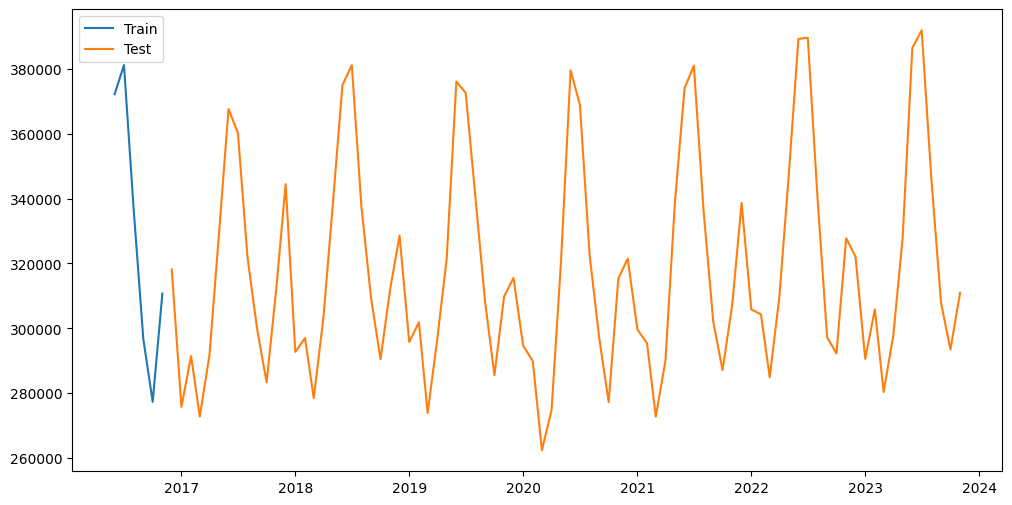

TEST: 90 TRAIN: 6


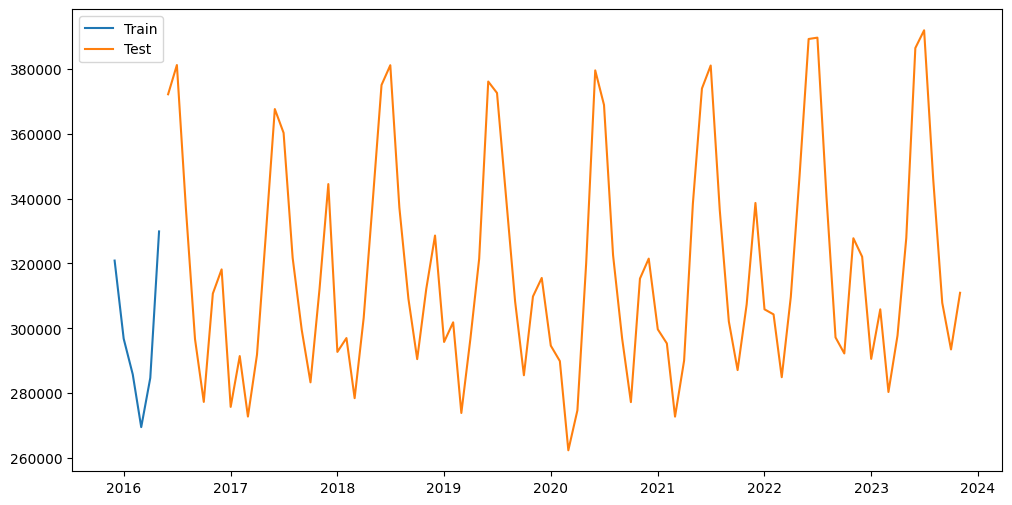

TEST: 96 TRAIN: 6


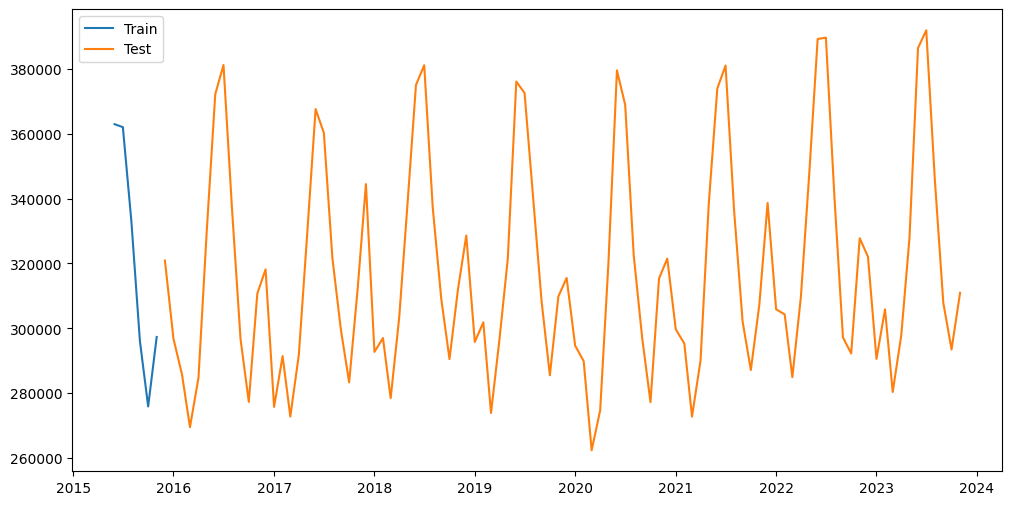

TEST: 102 TRAIN: 6


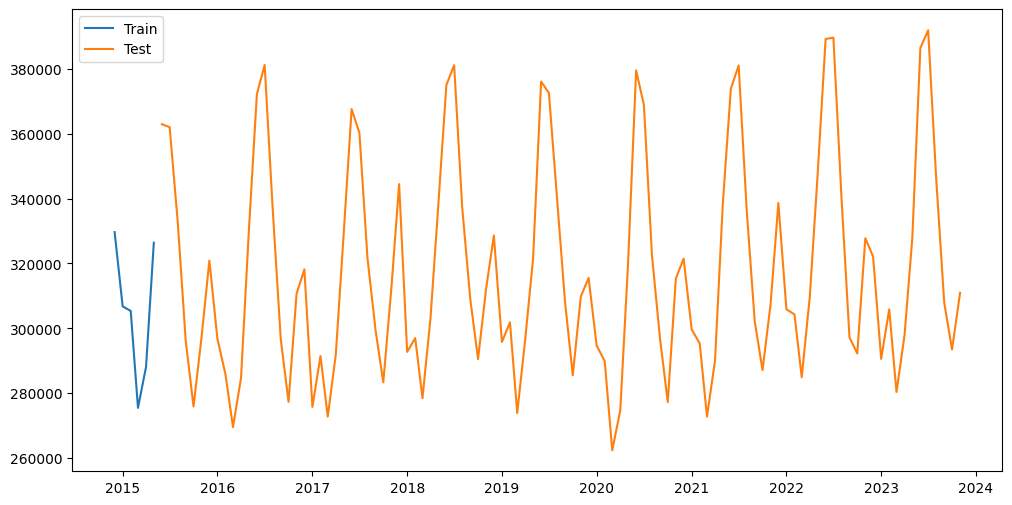

TEST: 108 TRAIN: 6


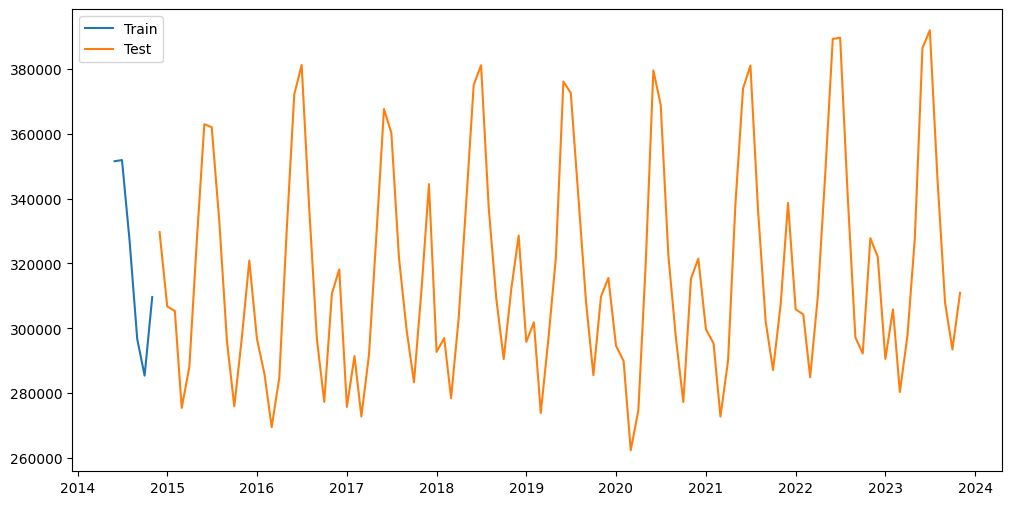

TEST: 114 TRAIN: 6


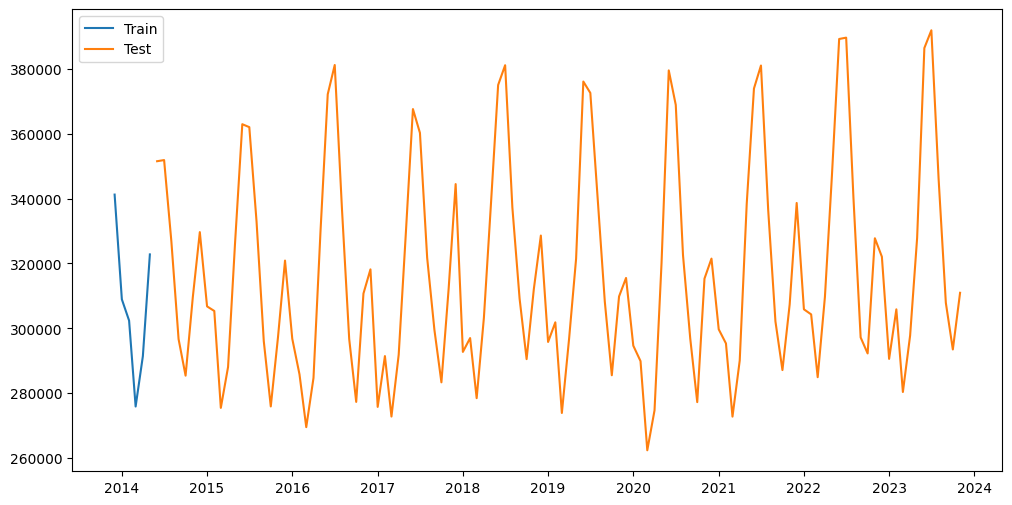

TEST: 120 TRAIN: 6


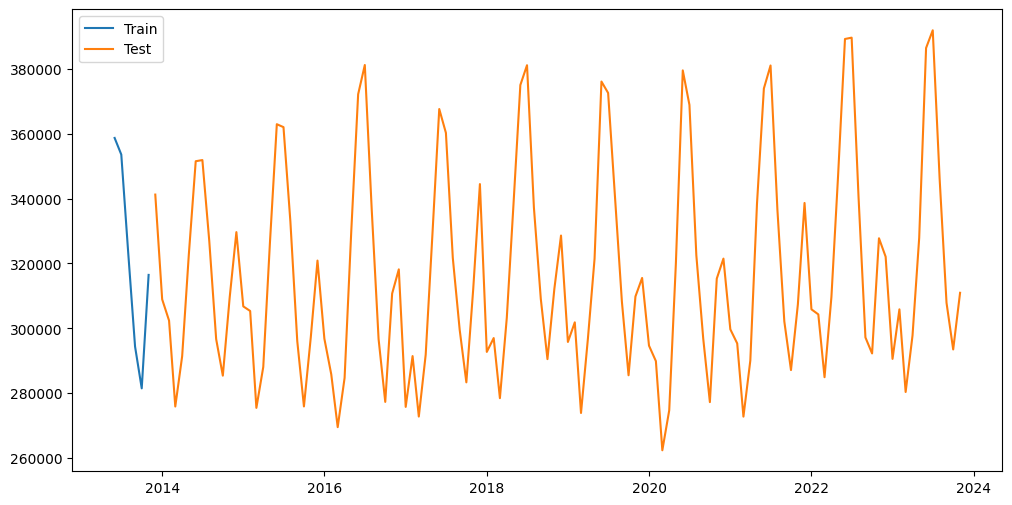

TEST: 126 TRAIN: 6


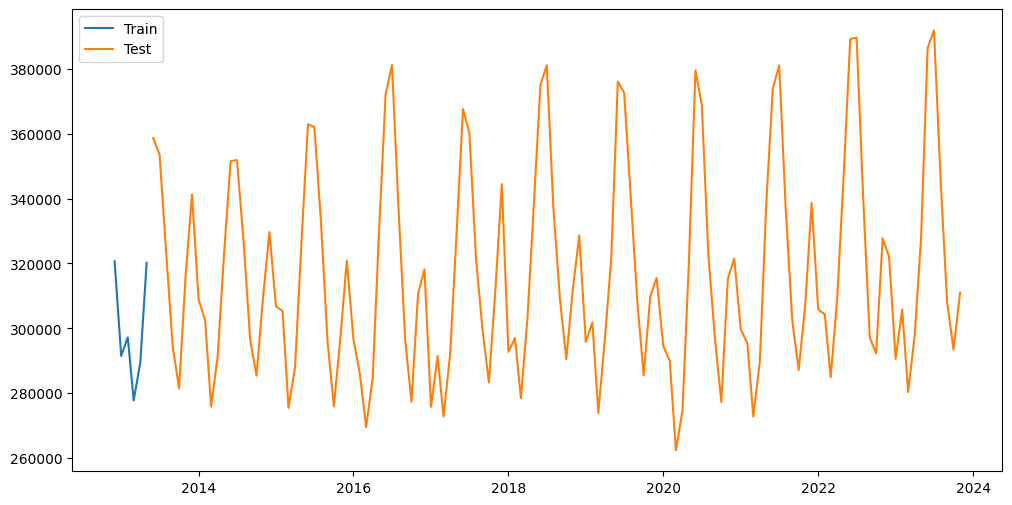

TEST: 132 TRAIN: 6


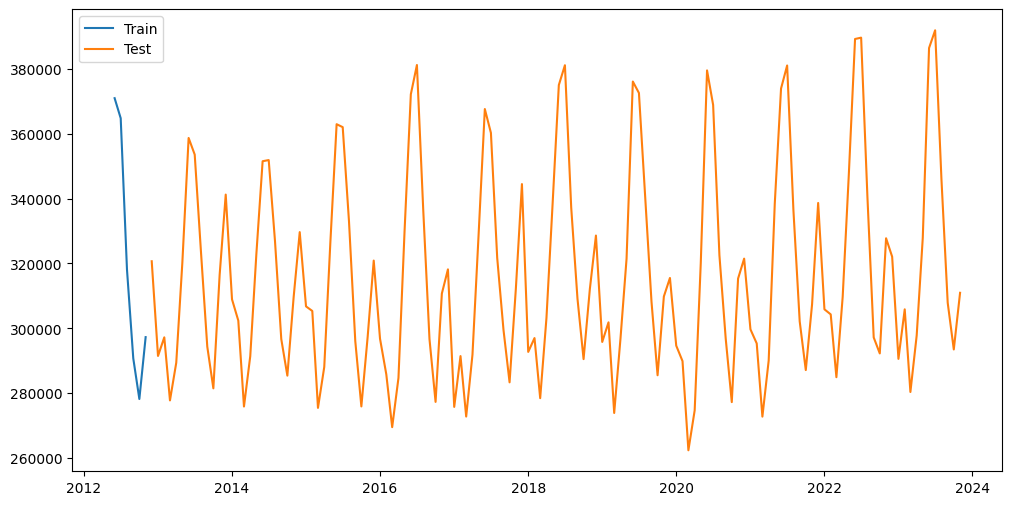

TEST: 138 TRAIN: 6


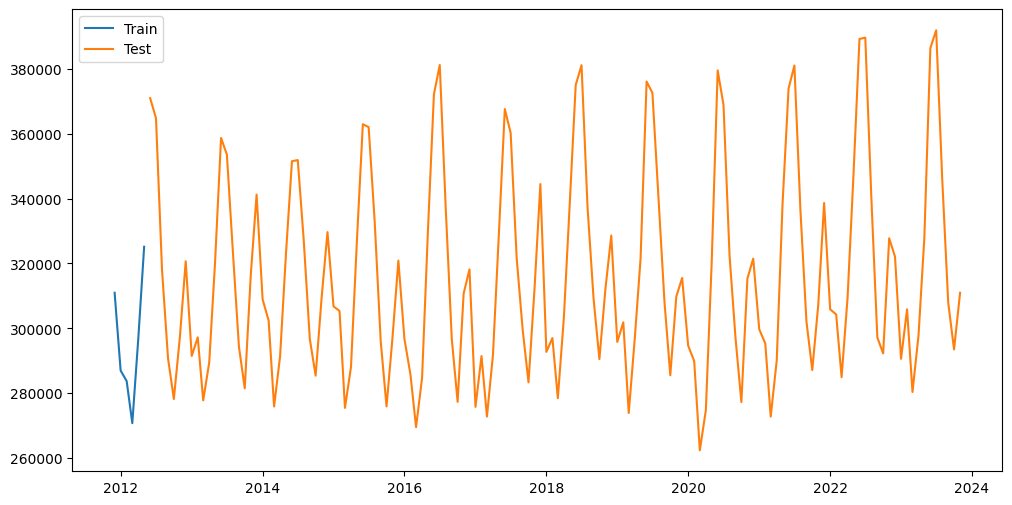

TEST: 144 TRAIN: 6


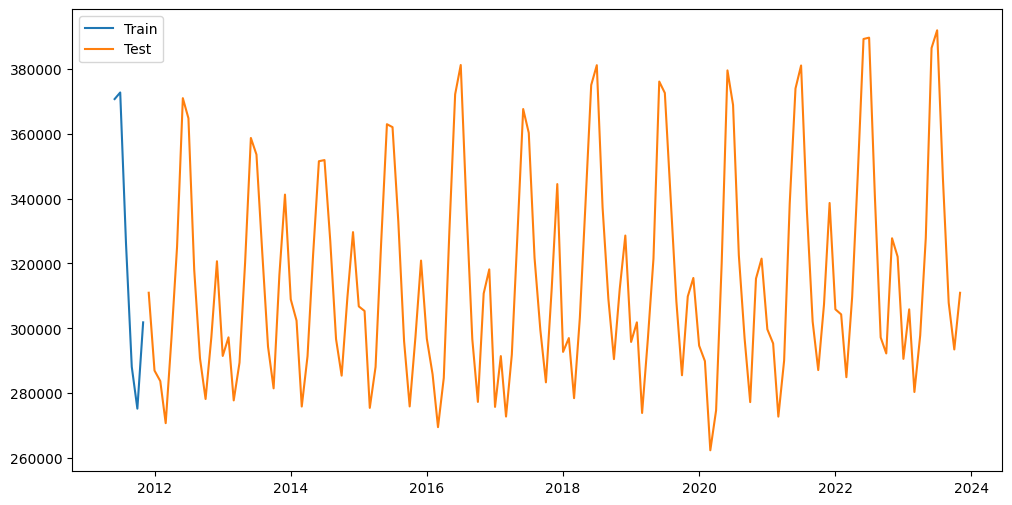

TEST: 150 TRAIN: 6


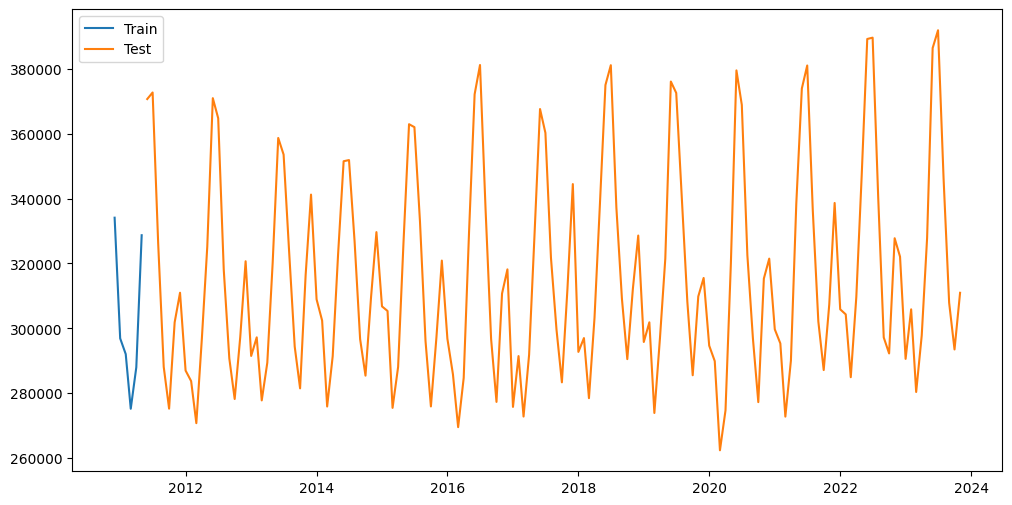

TEST: 156 TRAIN: 6


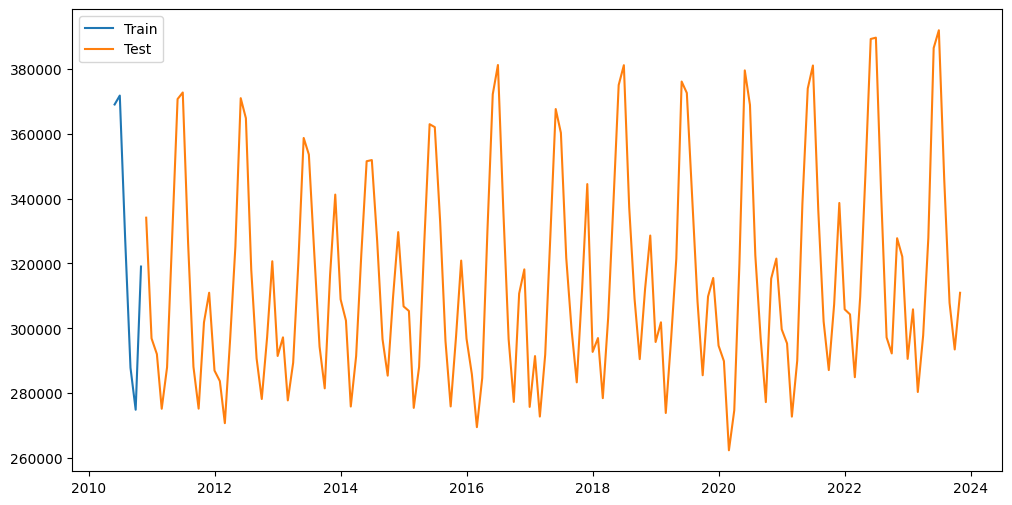

TEST: 162 TRAIN: 6


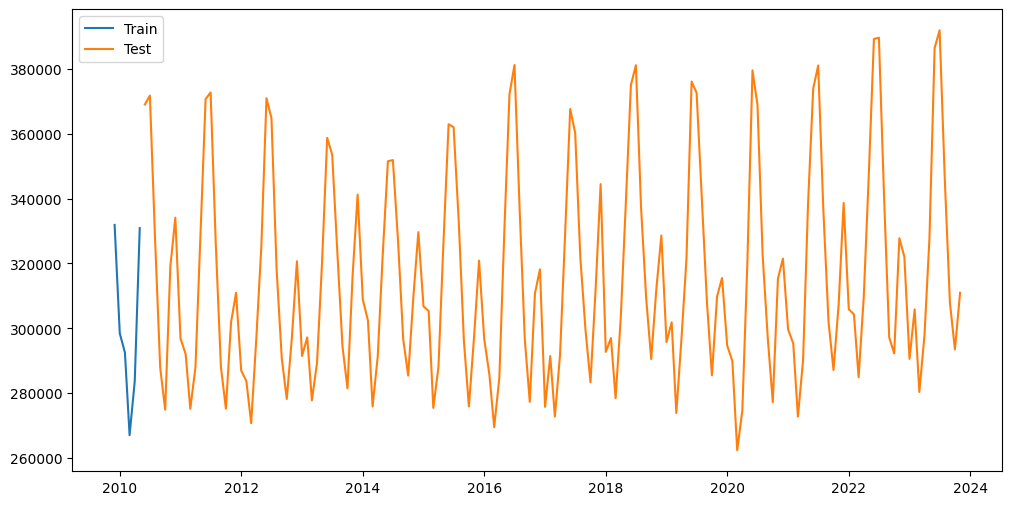

TEST: 168 TRAIN: 6


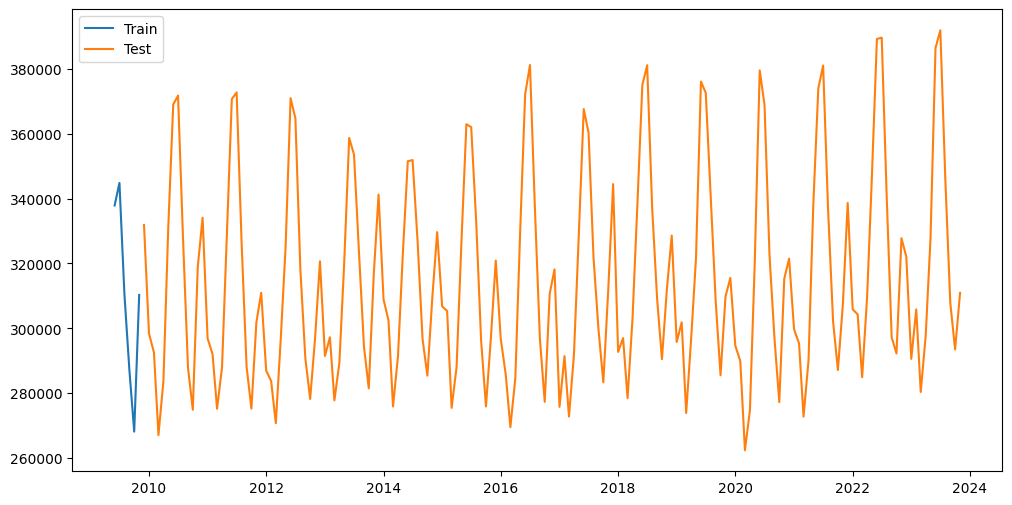

TEST: 174 TRAIN: 6


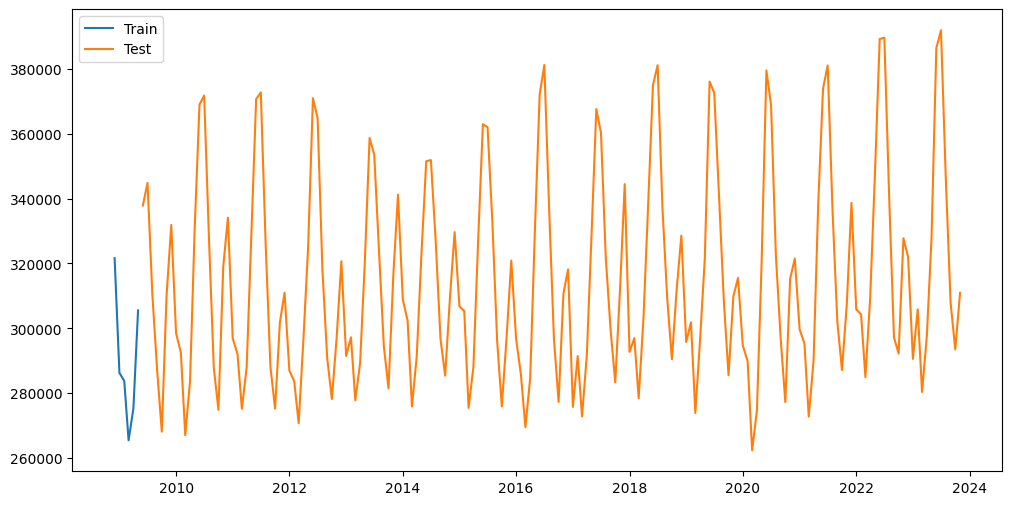

TEST: 180 TRAIN: 6


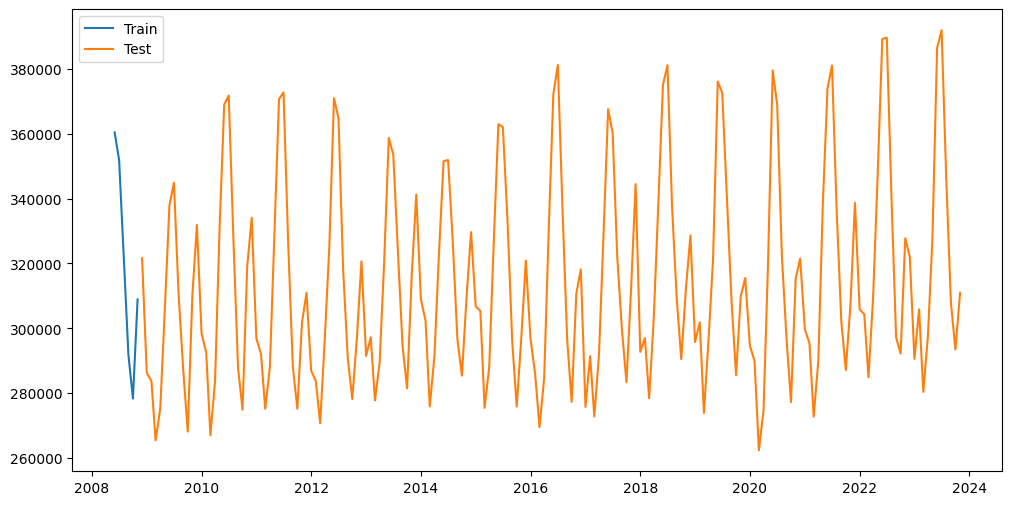

TEST: 186 TRAIN: 6


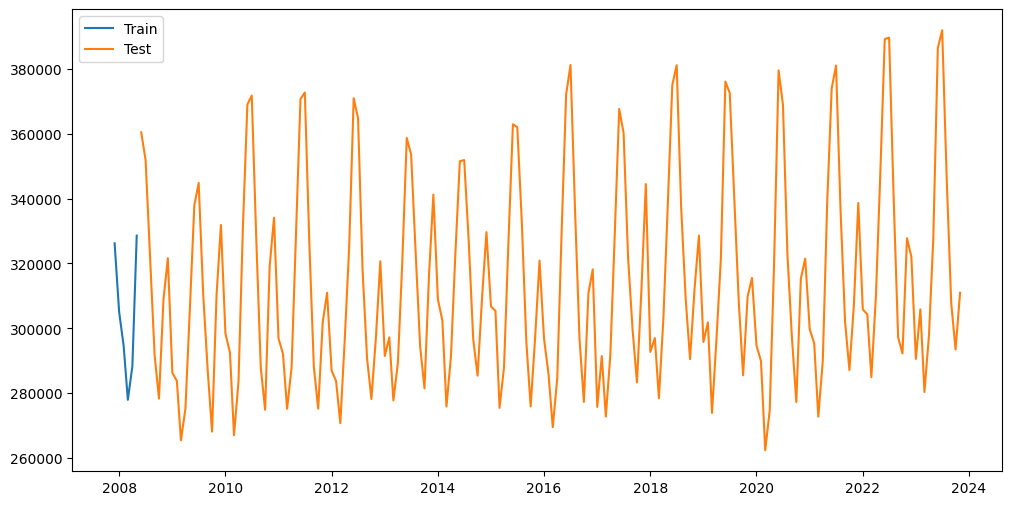

In [12]:
# use skitlearn to fold the data into 3year train and 0.5 year test
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=.39)
for test_index, train_index in tscv.split(df):
    print("TEST:", len(test_index), "TRAIN:", len(train_index))
    train = df.iloc[train_index]
    test = df.iloc[test_index]
    #plot train with test on the same plot
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.legend()
    plt.show()


In [9]:
beggin_index = 0
indexes_sets = []
for end_index in range(36, len(df), 36):
    indexes_sets.append((beggin_index, end_index))
    beggin_index = end_index